### Замерим качество Линейной регрессии после обработки данных не просто на отложенной выборке, но и на Кросс-Валидации на 4 фолдах!

In [28]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

In [4]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


#### ! Не перемешивайте данные

In [112]:
### Шаг №5
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный selector

### Your code is here

from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression

selector = KFold(n_splits=4)

### Шаг №5
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный selector

# ### Your code is here
lr = LinearRegression()
X = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']
scores = cross_validate(lr, X, y, cv = selector, scoring = "neg_mean_squared_error")
cross_val_error = np.mean(abs(scores['test_score']))

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.426


In [114]:
pwd

'/Users/kemran/Desktop/karpov_ml/ml/6_module_regularaz'

## Поработал один из хитрых гномов!

В отличие от своих собратьев, третий гном оказался тем еще бездельником в школьные годы, но все равно страстно желал во всем догнать первых двух. И сейчас, желая помочь им в построении модели по предсказанию длительности поездки такси, добавил в данные 20 зашифрованных фичей (их смысл нам не рассказали: какая-то секретная информация о водителях).

Гном думал следующим образом: "Ну не может же модель стать хуже! А тут вот авось и мое нововведение уменьшит ошибку в разы! Тогда и меня станут звать на гномий  data-саммит."

Проверим на кросс-валидации, насколько гном оказался прав!

In [136]:
new_data = pd.read_csv('new_data.csv', index_col='id')

In [138]:
new_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,1,1,1,1,1,...,0,0,0,0,0,1.500479,2.251437,3.378234,5.068969,7.605881
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,1.807119,3.265681,5.901475,10.664670,19.272331
id3858529,1,930.399753,0,6.392080,7.661527,1,1,1,1,1,...,0,0,0,0,0,6.392080,40.858690,261.172025,1669.432545,10671.146803
id3504673,1,930.399753,0,1.487155,6.063785,1,1,1,1,1,...,0,0,0,0,0,1.487155,2.211629,3.289035,4.891303,7.274125
id2181028,1,930.399753,0,1.189925,6.077642,1,1,1,1,1,...,0,0,0,0,0,1.189925,1.415923,1.684842,2.004837,2.385606


In [140]:
new_data.shape

(1458644, 25)

<Axes: >

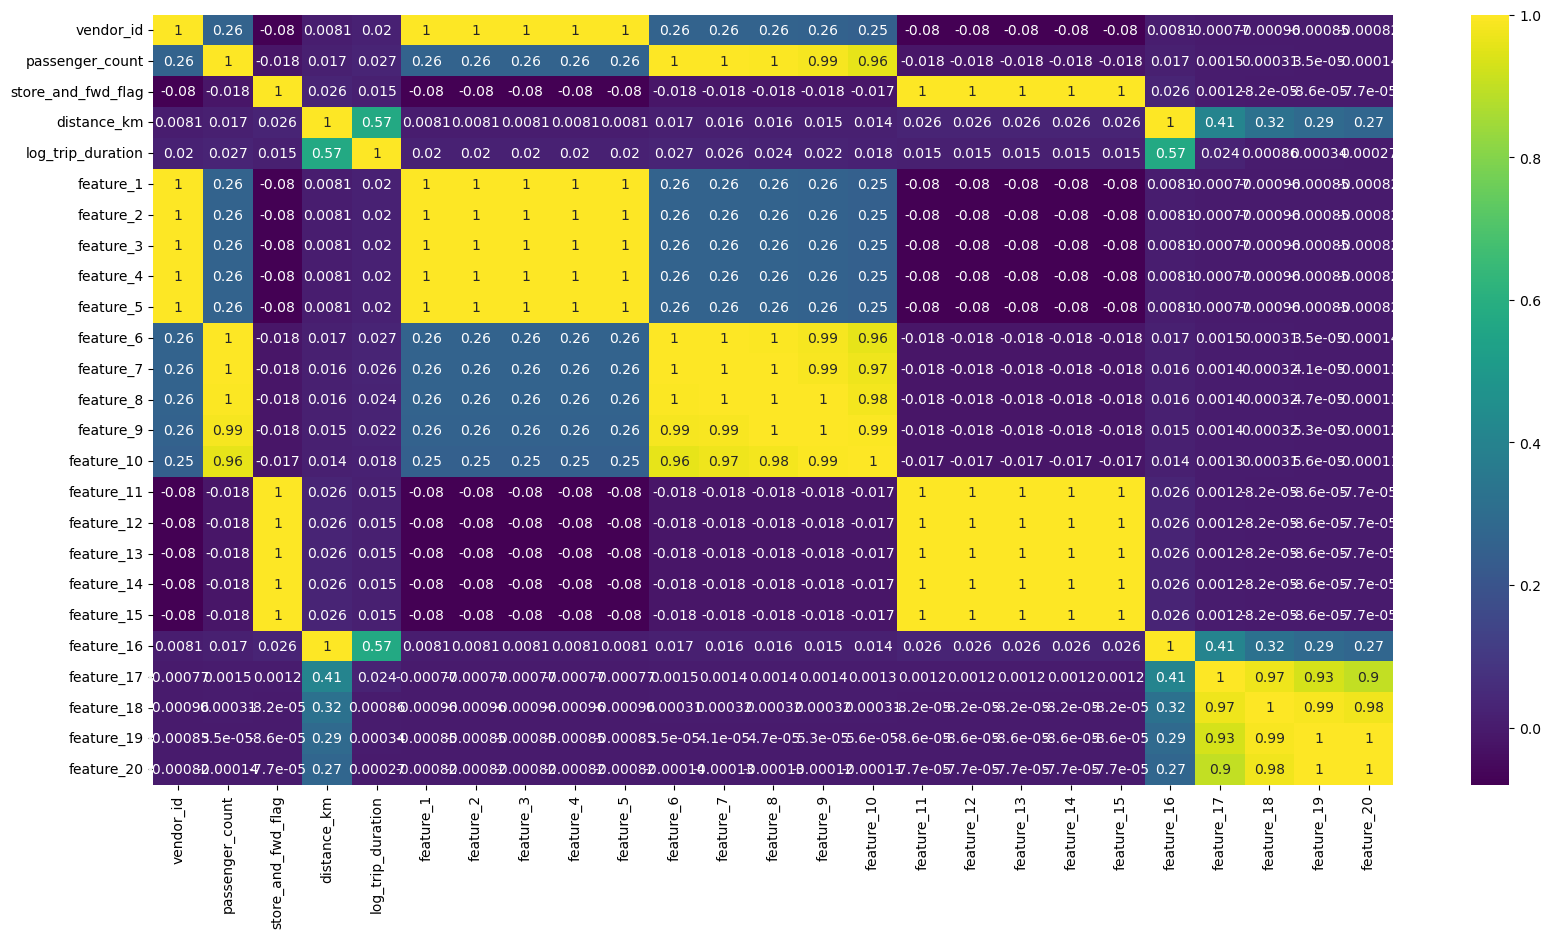

In [142]:
# Напишите Ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr(),cmap='viridis', annot = True)

In [144]:
### Шаг №6
### Замерьте качество (MSLE, как и раньше) на Кросс-валидации, 
### используя MSE от log_trip_duration и назначенный ранее selector

### Your code is here
from sklearn.model_selection import KFold,cross_validate
from sklearn.linear_model import LinearRegression

new_data_2 = new_data.dropna()

selector = KFold(n_splits=4)
linear = LinearRegression()
X_new = new_data_2.drop(['log_trip_duration'],axis=1)
y_new = new_data_2['log_trip_duration']
scores = cross_validate(linear,X_new,y_new,cv = selector,scoring = 'neg_mean_squared_error')
cross_val_error_2 = np.mean(abs(scores['test_score']))
print(f"MSLE на Кросс-валидации: {round(cross_val_error_2, 3)}")

MSLE на Кросс-валидации: 140.921


В линейной алгербре зачастую используют понятие **ранга матрицы**. Оно соответствует кол-ву линейно независимых столбцов в матрице. Иными словами, позволяет оценить, есть ли избыток информации в нашем датафрейме. Если ранг матрицы меньше, чем кол-во используемых столбцов, то некоторые фичи следует удалить, ведь иначе возникает ситуация строгой мультиколлинеарности.

Чтобы замерить ранг в наших матрицах объект-признак, можно воспользоваться функцией numpy.linalg.matrix_rank

Константным признаком в данном упражнении можно пренебречь.

In [152]:
### Шаг №7

### Создайте переменные rank_processed, rank_new 
### Соответственно равные рангу изначальной матрицы
### с данными и рангу матрицы третьего гнома

print(f"В первой модели всего фичей: {X.shape}, - а ранг равен {np.linalg.matrix_rank(X)}")

print(f"Во второй модели всего фичей: {X_new.shape}, - а ранг равен {np.linalg.matrix_rank(X_new)}")
# Как видим число фиче в новом датасете 24, а ранг 5, значит 19 фичей линейно зависимы

В первой модели всего фичей: (1458644, 4), - а ранг равен 4
Во второй модели всего фичей: (1458644, 24), - а ранг равен 5


Не кажется ли нам, что из-за новых 20 фичей появилась проблема мультиколлинеарности? Как поступить гному, чтобы, с одной стороны, получить адекватное качество, а с другой стороны, не повредить свое самолюбие и не убирать новые признаки?

Верно! Например, с помощью регуляризации.

Найдите такой параметр регуляризации $\alpha$ для Ridge и Lasso случая, чтобы ошибка MSLE на кросс-валидации оказалась строго меньше 0.4

**ALARM**: используйте процедуру масштабирования данных (воспользуйтесь методом MinMaxScaler) перед тем как применить регуляризацию. Важно - чтобы сохранить концепцию независимости обучения на трейне и на тесте, на каждой итерации кросс-валидации необходимо замерять параметры стандартизации исключительно на трейне, а потом применять на валидационном фолде.

In [154]:
### Пример, как это можно сделать в цикле
### То есть обучить Lasso, учитывая масштабирование
### Исключительно на трейне на каждой итерации



X = new_data.drop('log_trip_duration', axis=1)
Y = new_data['log_trip_duration']

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

scores = []

for train_index, test_index in selector.split(X):
    
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    
    ### Фитим исключительно на трейне!
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    ### Применяем обученный scaler на трейн и тест
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ### max_iter иногда требуется ставить побольше, 
    ### особенно когда данных много и/или они сложные
    ### этот параметр регулирует верхнюю границу кол-ва
    ### итераций во время обучения
    ### подробнее - в документации
    
    ### По дефолту здесь параметр регуляризации alpha=1
    
    model_lasso = Lasso(max_iter=100000) 
    model_lasso.fit(X_train_scaled, Y_train)
    
    predictions = model_lasso.predict(X_test_scaled)
    
    scores.append(np.mean((predictions - Y_test)**2))

    
print(f"MSLE на Кросс-валидации равен: {np.mean(scores)}")

### P.S. если вы уже умеете работать с конструкциями
### Pipeline, GridSearchCV, cross_validate
### Можете использовать их. Мы познакомимся с ними позже.

MSLE на Кросс-валидации равен: 0.6332330617999488


In [179]:
### Теперь найдите оптимальный параметр регуляризации
### для случая Ridge
### Напомним: ошибка на кросс-валидации должно быть 
### строго меньше 0.4

### Шаг №8
### Your code is here

from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing  import MinMaxScaler
from sklearn.linear_model import Lasso,Ridge


selector = KFold(n_splits=4)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
error = {}
for alpha in np.linspace(0.1,0.5,51):
    r = Ridge(alpha = alpha, max_iter=100000)
    scores = cross_validate(r,X_scaled,y_new,cv = selector,scoring = 'neg_mean_squared_error')
    cross_val_error = round(np.mean(abs(scores['test_score'])),3)
    error[alpha] = cross_val_error

In [209]:
best_alpha = min(error, key=error.get)
print(f'Лучший гиперпараметр альфа для Ridge регрессии:',best_alpha)

Лучший гиперпараметр альфа для Ridge регрессии: 0.1


In [219]:
### Найдите оптимальный параметр регуляризации
### для случая Lasso
### Напомним: ошибка на кросс-валидации должно быть 
### строго меньше 0.4

### Шаг №9

from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing  import MinMaxScaler
from sklearn.linear_model import Lasso,Ridge


selector = KFold(n_splits=4)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
error = {}
for alpha in np.linspace(1e-5, 1e-4, 10):
    l = Lasso(alpha = alpha, max_iter=100000)
    scores = cross_validate(l,X_scaled,y_new,cv = selector,scoring = 'neg_mean_squared_error')
    cross_val_error = round(np.mean(abs(scores['test_score'])),3)
    error[alpha] = cross_val_error



In [223]:
best_alpha = min(error, key=error.get)
print(f'Лучший гиперпараметр альфа для Ridge регрессии:',best_alpha)

Лучший гиперпараметр альфа для Ridge регрессии: 3.0000000000000004e-05
